In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

In [ ]:
train = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
test = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Se entrena desde la columna 1 para adelante
X = train.iloc[:,1:].to_numpy()
# se quiere predecir solo la columno 0
y = train.iloc[:,0].to_numpy()

In [ ]:
# Se entrena desde la columna 1 para adelante
X_hat = test.iloc[:,1:].to_numpy()
# se quiere predecir solo la columno 0
y_hat = test.iloc[:,0].to_numpy()

In [ ]:
num_rows, num_columns = X.shape
print("Número de filas:", num_rows)
print("Número de columnas:", num_columns)

Número de filas: 20000
Número de columnas: 784


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

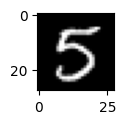

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(X[1, :].reshape(28,28), cmap='gray')

In [ ]:
y[1]

5

In [ ]:
res = cross_validate(DecisionTreeClassifier(max_depth=100),
                     X, y,
                     cv=15,
                     scoring ='accuracy',
                     return_train_score=True,
                     return_estimator=True)

In [ ]:
print("acc train: {} + +- {}"\
      .format(100*res["train_score"].mean(),
              100*res["train_score"].std()))
print("acc val: {} + +- {}"\
      .format(100*res["test_score"].mean(),
              100*res["test_score"].std()))

acc train: 100.0 + +- 0.0
acc val: 83.41007665709532 + +- 0.826126953751654


* Probar con 2 arboles mas
* Entrenar todo con la mejor opción
* Evaluar

*Primer Arbol*

In [ ]:
res = cross_validate(DecisionTreeClassifier(max_depth=20),
                     X, y,
                     cv=15,
                     scoring ='accuracy',
                     return_train_score=True,
                     return_estimator=True)

In [ ]:
print("acc train: {} + +- {}"\
      .format(100*res["train_score"].mean(),
              100*res["train_score"].std()))
print("acc val: {} + +- {}"\
      .format(100*res["test_score"].mean(),
              100*res["test_score"].std()))

acc train: 99.63571451507788 + +- 0.039267283934833495
acc val: 83.43007041115602 + +- 0.9739139601165945


*Segundo Arbol*

In [ ]:
res = cross_validate(DecisionTreeClassifier(max_depth=17),
                     X, y,
                     cv=15,
                     scoring ='accuracy',
                     return_train_score=True,
                     return_estimator=True)

In [ ]:
print("acc train: {} + +- {}"\
      .format(100*res["train_score"].mean(),
              100*res["train_score"].std()))
print("acc val: {} + +- {}"\
      .format(100*res["test_score"].mean(),
              100*res["test_score"].std()))

acc train: 99.33142904932704 + +- 0.0387315773238666
acc val: 83.6450379461432 + +- 0.7712245880390147


*Entrenar todo con la mejor opción*

In [ ]:
# Entrenar a la máquina
model = DecisionTreeClassifier(max_depth=17)

model.fit(X,y)

DecisionTreeClassifier(max_depth=17)

In [ ]:
accuracy_score(y, model.predict(X))*100

99.29

In [ ]:
accuracy_score(y_hat, model.predict(X_hat))*100

84.85000000000001